In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1 . Data collection

In [2]:
import yfinance as yf
from datetime import datetime

now = datetime.now()
start = datetime(now.year - 10, now.month, now.day)
end = now
ticker = 'AAPL'

# Download without grouping by ticker (prevents MultiIndex)
df = yf.download(ticker, start=start, end=end, group_by='column', auto_adjust=False)

# Rename 'Adj Close' to 'Price' if present
if 'Adj Close' in df.columns:
    df.rename(columns={'Adj Close': 'Price'}, inplace=True)

df

[*********************100%***********************]  1 of 1 completed


Price,Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-07-06,28.219824,31.500000,31.557501,31.212500,31.235001,112241600
2015-07-07,28.150393,31.422501,31.537500,30.942499,31.472500,187787200
2015-07-08,27.451609,30.642500,31.160000,30.635000,31.120001,243046400
2015-07-09,26.891699,30.017500,31.014999,29.805000,30.962500,314380000
2015-07-10,27.610634,30.820000,30.962500,30.302500,30.485001,245418000
...,...,...,...,...,...,...
2025-06-27,201.080002,201.080002,203.220001,200.000000,201.889999,73188600
2025-06-30,205.169998,205.169998,207.389999,199.259995,202.009995,91912800


In [3]:
df.head()

Price,Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-07-06,28.219824,31.500000,31.557501,31.212500,31.235001,112241600
2015-07-07,28.150393,31.422501,31.537500,30.942499,31.472500,187787200
2015-07-08,27.451609,30.642500,31.160000,30.635000,31.120001,243046400
2015-07-09,26.891699,30.017500,31.014999,29.805000,30.962500,314380000
2015-07-10,27.610634,30.820000,30.962500,30.302500,30.485001,245418000


In [4]:
df.tail()

Price,Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2025-06-27,201.080002,201.080002,203.220001,200.000000,201.889999,73188600
2025-06-30,205.169998,205.169998,207.389999,199.259995,202.009995,91912800
2025-07-01,207.820007,207.820007,210.190002,206.139999,206.669998,78788900
2025-07-02,212.440002,212.440002,213.339996,208.139999,208.910004,67941800
2025-07-03,213.550003,213.550003,214.649994,211.809998,212.149994,34955800


# 2. Data Exploration and Visualization

In [5]:
df

Price,Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-07-06,28.219824,31.500000,31.557501,31.212500,31.235001,112241600
2015-07-07,28.150393,31.422501,31.537500,30.942499,31.472500,187787200
2015-07-08,27.451609,30.642500,31.160000,30.635000,31.120001,243046400
2015-07-09,26.891699,30.017500,31.014999,29.805000,30.962500,314380000
2015-07-10,27.610634,30.820000,30.962500,30.302500,30.485001,245418000
...,...,...,...,...,...,...
2025-06-27,201.080002,201.080002,203.220001,200.000000,201.889999,73188600
2025-06-30,205.169998,205.169998,207.389999,199.259995,202.009995,91912800


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.shape

(2515, 6)

In [8]:
df.isna().sum()

Price   Ticker
Price   AAPL      0
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [9]:
df.describe()

Price,Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,103.447076,105.601024,106.659359,104.425812,105.497814,1.097357e+08
std,68.920893,68.504344,69.176380,67.739065,68.424589,6.446037e+07
min,20.647453,22.584999,22.917500,22.367500,22.500000,2.323470e+07
25%,39.006403,41.313749,41.872499,40.888750,41.353750,6.683560e+07
50%,88.662415,91.209999,92.617500,90.567497,91.250000,9.432680e+07
75%,163.690964,166.075005,167.869995,164.510002,166.049995,1.335778e+08
max,258.396667,259.019989,260.100006,257.630005,258.190002,6.488252e+08


In [10]:
df.dtypes

Price   Ticker
Price   AAPL      float64
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [11]:
df.head()


Price,Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-07-06,28.219824,31.500000,31.557501,31.212500,31.235001,112241600
2015-07-07,28.150393,31.422501,31.537500,30.942499,31.472500,187787200
2015-07-08,27.451609,30.642500,31.160000,30.635000,31.120001,243046400
2015-07-09,26.891699,30.017500,31.014999,29.805000,30.962500,314380000
2015-07-10,27.610634,30.820000,30.962500,30.302500,30.485001,245418000


In [12]:
df=df.reset_index()
df.head()

Price,Date,Price,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-07-06,28.219824,31.500000,31.557501,31.212500,31.235001,112241600
1,2015-07-07,28.150393,31.422501,31.537500,30.942499,31.472500,187787200
2,2015-07-08,27.451609,30.642500,31.160000,30.635000,31.120001,243046400
3,2015-07-09,26.891699,30.017500,31.014999,29.805000,30.962500,314380000
4,2015-07-10,27.610634,30.820000,30.962500,30.302500,30.485001,245418000


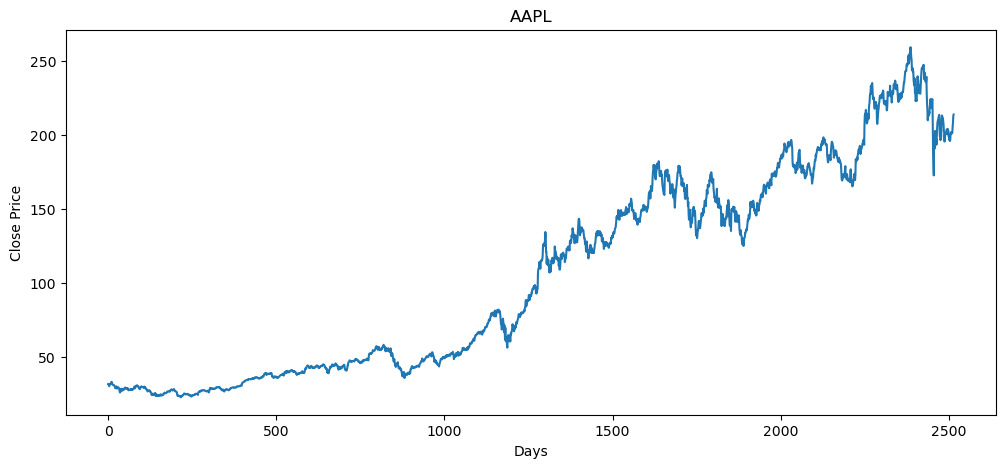

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days');
plt.ylabel('Close Price');

# Feature Engineering 

In [14]:
#10,20,30,40,50,60,70,80,90,100

In [15]:
temp_df = [10,20,30,40,50,60,70,80,90,100]
print(sum(temp_df[2:7])/5)

50.0


In [16]:
df1 = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [17]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 days moving average 

In [18]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Price,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-07-06,28.219824,31.500000,31.557501,31.212500,31.235001,112241600,NaN
1,2015-07-07,28.150393,31.422501,31.537500,30.942499,31.472500,187787200,NaN
2,2015-07-08,27.451609,30.642500,31.160000,30.635000,31.120001,243046400,NaN
3,2015-07-09,26.891699,30.017500,31.014999,29.805000,30.962500,314380000,NaN
4,2015-07-10,27.610634,30.820000,30.962500,30.302500,30.485001,245418000,NaN


In [19]:
df.head(103)

Price,Date,Price,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-07-06,28.219824,31.500000,31.557501,31.212500,31.235001,112241600,NaN
1,2015-07-07,28.150393,31.422501,31.537500,30.942499,31.472500,187787200,NaN
2,2015-07-08,27.451609,30.642500,31.160000,30.635000,31.120001,243046400,NaN
3,2015-07-09,26.891699,30.017500,31.014999,29.805000,30.962500,314380000,NaN
4,2015-07-10,27.610634,30.820000,30.962500,30.302500,30.485001,245418000,NaN
...,...,...,...,...,...,...,...,...
98,2015-11-20,26.955080,29.825001,29.980000,29.712500,29.799999,137148400,NaN
99,2015-11-23,26.604860,29.437500,29.932501,29.334999,29.817499,129930000,29.096325
100,2015-11-24,26.860178,29.719999,29.837500,29.280001,29.332500,171212800,29.078525


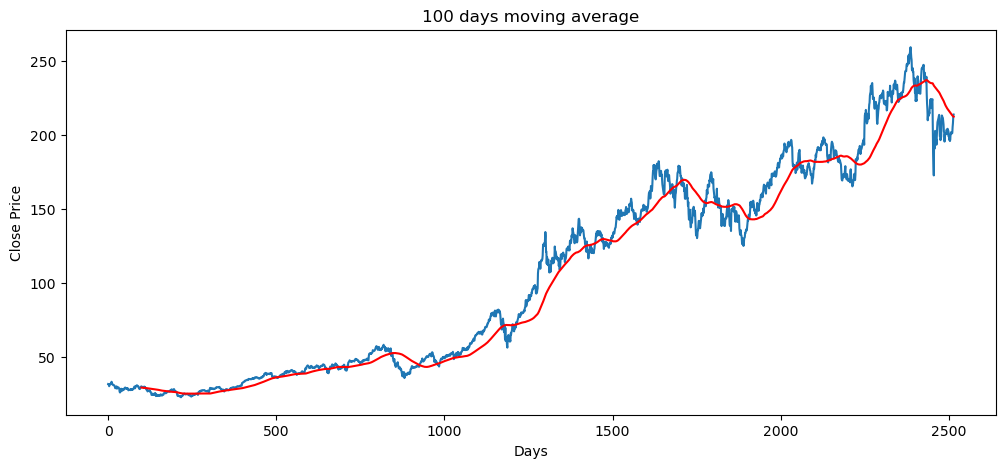

In [20]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.title('100 days moving average')
plt.xlabel('Days');
plt.ylabel('Close Price');


## 200 days moving average 

In [21]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head()

Price,Date,Price,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-07-06,28.219824,31.500000,31.557501,31.212500,31.235001,112241600,NaN,NaN
1,2015-07-07,28.150393,31.422501,31.537500,30.942499,31.472500,187787200,NaN,NaN
2,2015-07-08,27.451609,30.642500,31.160000,30.635000,31.120001,243046400,NaN,NaN
3,2015-07-09,26.891699,30.017500,31.014999,29.805000,30.962500,314380000,NaN,NaN
4,2015-07-10,27.610634,30.820000,30.962500,30.302500,30.485001,245418000,NaN,NaN


In [22]:
df.head(203)

Price,Date,Price,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-07-06,28.219824,31.500000,31.557501,31.212500,31.235001,112241600,NaN,NaN
1,2015-07-07,28.150393,31.422501,31.537500,30.942499,31.472500,187787200,NaN,NaN
2,2015-07-08,27.451609,30.642500,31.160000,30.635000,31.120001,243046400,NaN,NaN
3,2015-07-09,26.891699,30.017500,31.014999,29.805000,30.962500,314380000,NaN,NaN
4,2015-07-10,27.610634,30.820000,30.962500,30.302500,30.485001,245418000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
198,2016-04-18,24.416193,26.870001,27.237499,26.735001,27.222500,243286000,26.119325,NaN
199,2016-04-19,24.286709,26.727501,27.000000,26.557501,26.969999,129539600,26.092225,27.594275
200,2016-04-20,24.336685,26.782499,27.022499,26.514999,26.660000,122444000,26.062850,27.570687


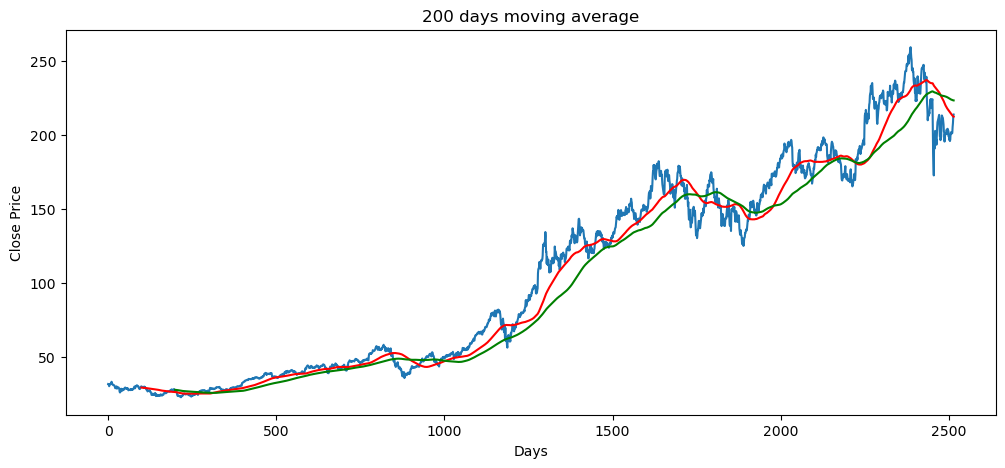

In [23]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.plot(df['MA_200'],'g')

plt.title('200 days moving average')
plt.xlabel('Days');
plt.ylabel('Close Price');

### Calculating % changed in each trading session

In [24]:
df['Percentage_changed']=df.Close.pct_change()
df[['Close','Percentage_changed']]

Price,Close,Percentage_changed
Ticker,AAPL,
0,31.500000,NaN
1,31.422501,-0.002460
2,30.642500,-0.024823
3,30.017500,-0.020397
4,30.820000,0.026734
...,...,...
2510,201.080002,0.000398
2511,205.169998,0.020340
2512,207.820007,0.012916


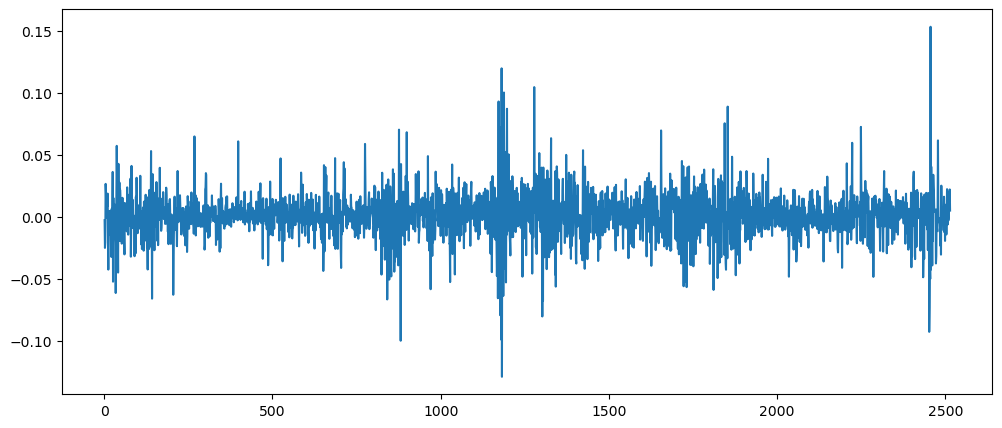

In [25]:
plt.figure(figsize=(12,5))
plt.plot(df.Percentage_changed)

# Data preprocessing 

In [26]:
df.shape

(2515, 10)

# spliting data into training and testing datasets

In [27]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])

print(data_training)
print(data_testing)

Ticker        AAPL
0        31.500000
1        31.422501
2        30.642500
3        30.017500
4        30.820000
...            ...
1755    138.270004
1756    141.660004
1757    141.660004
1758    137.440002
1759    139.229996

[1760 rows x 1 columns]
Ticker        AAPL
1760    136.720001
1761    138.929993
1762    141.559998
1763    142.919998
1764    146.350006
...            ...
2510    201.080002
2511    205.169998
2512    207.820007
2513    212.440002
2514    213.550003

[755 rows x 1 columns]


In [28]:
data_training

Ticker,AAPL
0,31.500000
1,31.422501
2,30.642500
3,30.017500
4,30.820000
...,...
1755,138.270004
1756,141.660004
1757,141.660004
1758,137.440002


In [29]:
data_testing

Ticker,AAPL
1760,136.720001
1761,138.929993
1762,141.559998
1763,142.919998
1764,146.350006
...,...
2510,201.080002
2511,205.169998
2512,207.820007
2513,212.440002


In [30]:
# scaling down the data between 0 and 1

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [32]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.05591972],
       [0.0554336 ],
       [0.05054101],
       ...,
       [0.74690298],
       [0.72043285],
       [0.73166066]])

In [33]:
type(data_training_array)

numpy.ndarray

In [34]:
data_training_array.shape

(1760, 1)

# 5 sequence creation

In [35]:
#12,13,12,15,10,14,16,18,19,20

In [36]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [37]:
x_train

array([[[0.05591972],
        [0.0554336 ],
        [0.05054101],
        ...,
        [0.04459778],
        [0.04541322],
        [0.0429826 ]],

       [[0.0554336 ],
        [0.05054101],
        [0.04662067],
        ...,
        [0.04541322],
        [0.0429826 ],
        [0.04475459]],

       [[0.05054101],
        [0.04662067],
        [0.05165439],
        ...,
        [0.0429826 ],
        [0.04475459],
        [0.04342168]],

       ...,

       [[0.95358323],
        [0.96129843],
        [0.94285714],
        ...,
        [0.70732326],
        [0.72563907],
        [0.74690298]],

       [[0.96129843],
        [0.94285714],
        [0.93965818],
        ...,
        [0.72563907],
        [0.74690298],
        [0.74690298]],

       [[0.94285714],
        [0.93965818],
        [0.93507925],
        ...,
        [0.74690298],
        [0.74690298],
        [0.72043285]]])

In [38]:
x_train.ndim

3

In [39]:
y_train.ndim

1

In [40]:
x_train.shape

(1660, 100, 1)

In [41]:
y_train.shape


(1660,)

# 6. Machine learning model 

In [42]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [43]:
# Ml model
from keras.models import Sequential
from keras.layers import Dense,LSTM,Input

In [44]:
model = Sequential()
model.add(Input(shape=(100,1))) #it will take hundred data and gives tommorow prediction 100 previous day price 1 is feature is closing price
model.add(LSTM(units=128,activation='tanh',return_sequences=True)) # passing input models to lstm model i want lstm to have 128 neurons
#and return_sequences=True gives sequences of ouptputs
model.add(LSTM(units=64))#this will generate a single output by getting the sequences from the first
model.add(Dense(25))#takes single output generated in the single model and analyse in twenty five different angles and then it will pass the 
#findings to the next layer,we will write this dense at last only
model.add(Dense(1))#takes 25 outputs and combines into a single one

# 7. Model Training

In [45]:
model.compile(optimizer='adam',loss='mean_squared_error')#optimizer='adam' adam  is a  optimizer algorithm
model.fit(x_train,y_train,epochs=50) #epochs means asking the model to go through xtrain and ytrain 50times

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0253
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 5.1315e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 4.9920e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 4.5865e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 4.5546e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 4.4166e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 4.1433e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 5.0220e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 4.5384e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 3.6278e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 3.5974e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 4.0111e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 3.4832e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 3.9662e-04
Epoch 15/50
52/52 ━

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [47]:
#save the model
model.save('stock_prediction_model.keras')

# 8. Testing the data

In [50]:
data_training.tail(100)

Ticker,AAPL
1660,172.389999
1661,171.660004
1662,174.830002
1663,176.279999
1664,172.119995
...,...
1755,138.270004
1756,141.660004
1757,141.660004
1758,137.440002


In [48]:
data_testing

Ticker,AAPL
1760,136.720001
1761,138.929993
1762,141.559998
1763,142.919998
1764,146.350006
...,...
2510,201.080002
2511,205.169998
2512,207.820007
2513,212.440002


In [51]:
past_100_days = data_training.tail(100)

In [52]:
past_100_days

Ticker,AAPL
1660,172.389999
1661,171.660004
1662,174.830002
1663,176.279999
1664,172.119995
...,...
1755,138.270004
1756,141.660004
1757,141.660004
1758,137.440002


In [54]:
final_df = pd.concat([past_100_days,data_testing],ignore_index=True)
final_df

Ticker,AAPL
0,172.389999
1,171.660004
2,174.830002
3,176.279999
4,172.119995
...,...
850,201.080002
851,205.169998
852,207.820007
853,212.440002


In [55]:
#to fit the data between 0 and 1
input_data = scaler.fit_transform(final_df)
input_data

array([[3.53507503e-01],
       [3.48059774e-01],
       [3.71716478e-01],
       [3.82537351e-01],
       [3.51492546e-01],
       [3.25522427e-01],
       [3.27313513e-01],
       [3.56492533e-01],
       [3.54701561e-01],
       [3.27313513e-01],
       [3.15522454e-01],
       [2.93283678e-01],
       [2.61567259e-01],
       [2.81492619e-01],
       [2.97238893e-01],
       [2.99253737e-01],
       [2.84925392e-01],
       [3.10000024e-01],
       [3.07537324e-01],
       [2.84701520e-01],
       [2.55820958e-01],
       [2.41940356e-01],
       [2.83059720e-01],
       [2.50000071e-01],
       [2.21716424e-01],
       [1.91044776e-01],
       [2.24402996e-01],
       [2.57985087e-01],
       [2.65671646e-01],
       [2.90746278e-01],
       [3.01194108e-01],
       [3.26865770e-01],
       [3.37238900e-01],
       [3.66044877e-01],
       [3.70895578e-01],
       [3.77462779e-01],
       [4.02537412e-01],
       [3.93656796e-01],
       [3.70074678e-01],
       [3.67835849e-01],


In [56]:
input_data.shape

(855, 1)

In [58]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):  # index of the rows is 0 (input_data.shape)
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [59]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [63]:
x_test[0].shape

(100, 1)

In [61]:
y_test

array([8.73134720e-02, 1.03805946e-01, 1.23432850e-01, 1.33582109e-01,
       1.59179184e-01, 1.64328343e-01, 1.48134325e-01, 1.55522427e-01,
       1.52761269e-01, 1.75000044e-01, 1.87686589e-01, 1.64552328e-01,
       1.93880633e-01, 2.09104464e-01, 2.26343367e-01, 2.16940309e-01,
       2.08432850e-01, 1.98358291e-01, 2.37089541e-01, 2.41268741e-01,
       2.79776119e-01, 2.72313432e-01, 2.61119402e-01, 3.06791124e-01,
       3.04403009e-01, 3.00970237e-01, 2.97388065e-01, 2.97761222e-01,
       3.30000085e-01, 3.24403070e-01, 3.51343374e-01, 3.59477676e-01,
       3.58283618e-01, 3.69626935e-01, 3.66641791e-01, 3.47015002e-01,
       3.17537411e-01, 3.15000011e-01, 3.17238840e-01, 3.35895557e-01,
       2.88059707e-01, 2.71343361e-01, 2.52910515e-01, 2.40298555e-01,
       2.45820985e-01, 2.29776139e-01, 2.20223909e-01, 2.30895611e-01,
       2.19701580e-01, 2.41417913e-01, 2.86641778e-01, 2.15074637e-01,
       2.26044796e-01, 2.04104478e-01, 1.91641804e-01, 2.19850752e-01,
      

# 9. Making predictions

In [64]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step 


In [65]:
y_predicted #this is predicted price 

array([[0.1013621 ],
       [0.09153287],
       [0.09079879],
       [0.10046329],
       [0.11322216],
       [0.13255878],
       [0.14783621],
       [0.1485953 ],
       [0.14865653],
       [0.14702064],
       [0.15531461],
       [0.16789663],
       [0.16577055],
       [0.17460081],
       [0.18872175],
       [0.20576859],
       [0.21123943],
       [0.20766126],
       [0.19899799],
       [0.2114161 ],
       [0.22436233],
       [0.25050285],
       [0.2631222 ],
       [0.2612298 ],
       [0.28038946],
       [0.29226202],
       [0.2949997 ],
       [0.2927032 ],
       [0.29081964],
       [0.30704468],
       [0.3151267 ],
       [0.33252972],
       [0.34668392],
       [0.35195643],
       [0.35907683],
       [0.3605934 ],
       [0.34932357],
       [0.326191  ],
       [0.31286156],
       [0.30964154],
       [0.32036123],
       [0.30251297],
       [0.28145567],
       [0.2612664 ],
       [0.24523835],
       [0.24079582],
       [0.23294106],
       [0.223

In [66]:
y_test #this is original price

array([8.73134720e-02, 1.03805946e-01, 1.23432850e-01, 1.33582109e-01,
       1.59179184e-01, 1.64328343e-01, 1.48134325e-01, 1.55522427e-01,
       1.52761269e-01, 1.75000044e-01, 1.87686589e-01, 1.64552328e-01,
       1.93880633e-01, 2.09104464e-01, 2.26343367e-01, 2.16940309e-01,
       2.08432850e-01, 1.98358291e-01, 2.37089541e-01, 2.41268741e-01,
       2.79776119e-01, 2.72313432e-01, 2.61119402e-01, 3.06791124e-01,
       3.04403009e-01, 3.00970237e-01, 2.97388065e-01, 2.97761222e-01,
       3.30000085e-01, 3.24403070e-01, 3.51343374e-01, 3.59477676e-01,
       3.58283618e-01, 3.69626935e-01, 3.66641791e-01, 3.47015002e-01,
       3.17537411e-01, 3.15000011e-01, 3.17238840e-01, 3.35895557e-01,
       2.88059707e-01, 2.71343361e-01, 2.52910515e-01, 2.40298555e-01,
       2.45820985e-01, 2.29776139e-01, 2.20223909e-01, 2.30895611e-01,
       2.19701580e-01, 2.41417913e-01, 2.86641778e-01, 2.15074637e-01,
       2.26044796e-01, 2.04104478e-01, 1.91641804e-01, 2.19850752e-01,
      

In [67]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten() #now we want to take the scaled data and convert back it to original state 
#-1 means automatically calculate the no. of rows based on the length of the data and the number of columns , 1 is columns , we use flatten() to convert 
#it into 1D array
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten() # confirming that both of these will be in the same shape

In [68]:
y_predicted # this price was predicted by our model

array([138.60251 , 137.2854  , 137.18704 , 138.48207 , 140.19177 ,
       142.78287 , 144.83005 , 144.93176 , 144.93997 , 144.72076 ,
       145.83215 , 147.51814 , 147.23325 , 148.4165  , 150.30872 ,
       152.59299 , 153.32608 , 152.8466  , 151.68571 , 153.34975 ,
       155.08455 , 158.58739 , 160.27837 , 160.0248  , 162.5922  ,
       164.1831  , 164.54996 , 164.24223 , 163.98982 , 166.16399 ,
       167.24698 , 169.57898 , 171.47565 , 172.18216 , 173.13629 ,
       173.33951 , 171.82936 , 168.7296  , 166.94344 , 166.51196 ,
       167.9484  , 165.55673 , 162.73506 , 160.0297  , 157.88194 ,
       157.28664 , 156.2341  , 155.033   , 155.06708 , 154.58804 ,
       155.62997 , 159.4183  , 157.17557 , 155.59589 , 153.387   ,
       151.31433 , 152.00087 , 154.08513 , 154.02977 , 153.14062 ,
       151.39468 , 150.42726 , 150.49693 , 149.87762 , 146.13109 ,
       141.64781 , 140.70853 , 142.45323 , 144.29544 , 145.02228 ,
       142.89458 , 141.14244 , 139.54973 , 138.37262 , 139.660

y_test

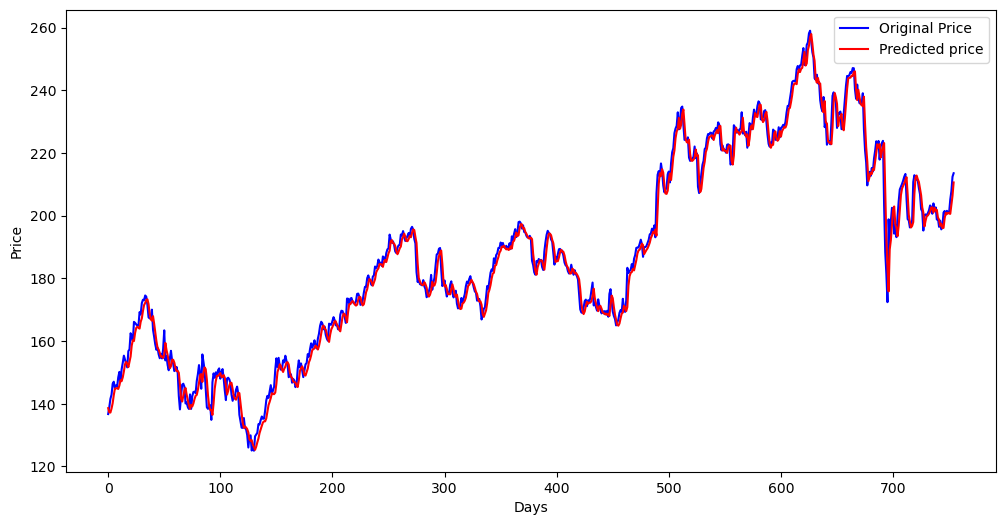

In [74]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend();

(140.0, 220.0)

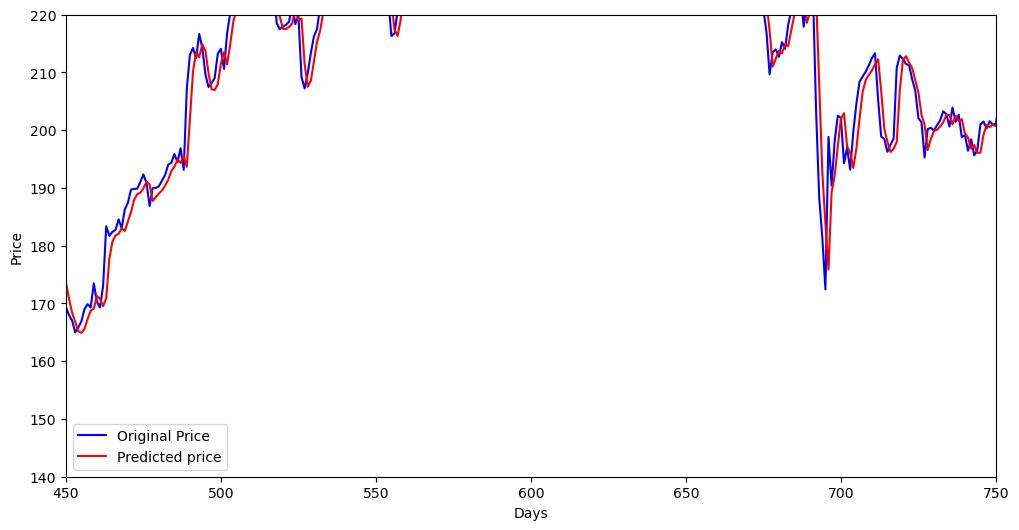

In [72]:
#this is the 30% of the data
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend();
plt.xlim(450,750) # both of the line to zoom into the graph
plt.ylim(140,220) # zoom in y axis



# 10. Model evaluation

In [79]:
#mean squared error measures the squares between predicted values and actual values
from sklearn.metrics import mean_squared_error , r2_score

In [77]:
mse = mean_squared_error(y_test,y_predicted)
print(f"Mean squared error(MSE):{mse}")

Mean squared error(MSE):12.905234571751082


In [78]:
#root mean squared error(rmse) square root od mse
rmse = np.sqrt(mse)
print(f"Root squared error(MSE):{rmse}")

Root squared error(MSE):3.59238563795023


In [80]:
# R-squared how will model prediction values will match your actual values
r2 = r2_score(y_test,y_predicted)
print(f"R squared:{r2}")

R squared:0.986647590546235
